# Lina bouallegue 
# 2lm2 TP2
# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [8]:
import numpy as np

### Simulation du lancé de dé

In [87]:
def Roll():
    return int(np.random.choice(7,1))

In [88]:
Roll()

5

### Compléter le code et commenter

In [89]:
A=0#position
NA=0  
S=10 
temp=Roll() #la fonction roll() sert a avancer le dé de sa position initiale jusqu au cible 
NA+=1
print(NA,temp)
while (temp !=6) :
    temp=Roll()
    NA+=1
    print(NA,temp)
A=1
print("sortie de la prison après {} coups".format(NA))
while(A<S): 
    temp=Roll()
    if((temp+A<S)):
        NA+=1
        A+=temp;
        print(NA,temp,A)
    elif temp+A>S:
        NA+=1
        print(NA,temp,A)
    else:
        A=S
        NA+=1
        print(NA,temp,A) 

1 3
2 0
3 1
4 5
5 6
sortie de la prison après 5 coups
6 5 6
7 1 7
8 5 7
9 5 7
10 3 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [90]:
def sim(S):
    A=0#prison
    NA=0#compteur
    temp=Roll()
    NA+=1
    while (temp !=6) : 
        temp=Roll()
        NA+=1
    A=1
    while(A<S):
        temp=Roll()
        if((temp+A<S)):
        
            NA+=1
            A+=temp
        
        elif temp+A>S:
            NA+=1
        
        else:
            A=S
            NA+=1
    return NA
    
   

In [91]:
sim(20)

11

In [92]:
#simulation 10000 fois n=30
L=[sim(30) for i in range(10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de X_30={}'.format(Moy))

estimation de la moyenne de X_30=22.351


### Simulation de $10^5$  scénario 

In [93]:
x=list(range(10,20)) 
x
y=[sum([sim(u) for i in range(10000)])/10000 for u in x] 


In [94]:
import matplotlib.pyplot as plt

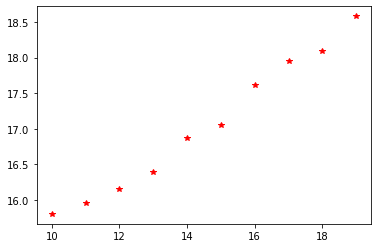

In [95]:
plt.plot(x,y,'*r')
plt.show()

In [96]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) 

In [97]:
#pip install scipy

In [98]:
slope

0.3195969696969699

In [99]:
intercept


12.416213939393934

In [100]:
yy=[slope*u +intercept for u in x]

 E(x_n)=0.3195969696969699x+12.416213939393934

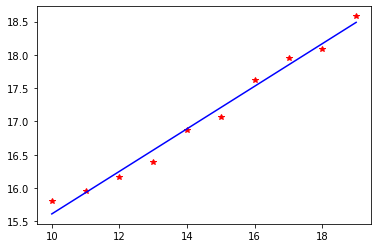

In [101]:
plt.plot(x,y,'*r',x,yy,'-b')
